<h1 style="color:orange">QDA Exam - June 2024</h1> 
Francesco Marco Riboli - 10502512 - 8CFU

# Exercise 1

**Question 1:**

b) As the probability of type I error increases, the power of the test will increase.

**Justification:**
- The power of a test is defined as \( 1 - \beta \), where \(\beta\) is the probability of a Type II error.
- The probability of a Type I error (\(\alpha\)) and the power of the test are inversely related in many testing scenarios. As \(\alpha\) increases, the critical region for rejecting the null hypothesis becomes larger, making it easier to reject the null hypothesis. This in turn reduces the probability of a Type II error, \(\beta\), thereby increasing the power of the test.
- Therefore, increasing \(\alpha\) (Type I error probability) typically increases the power of the test.

**Question 2:**

c) We cannot tell if \( \text{SSE}_X < \text{SSE}_Z \) or \( \text{SSE}_X > \text{SSE}_Z \) from the given information.

**Justification:**
- \( \text{SSE} \) (Sum of Squared Errors) in regression analysis measures the total deviation of the observed values from the fitted values.
- Given the correlation coefficients \(\text{corr}(Y, X") = -0.57\) and \(\text{corr}(Y, X#) = +0.39\), we can infer the strength and direction of the linear relationships, but this does not directly translate to which simple linear regression has a lower \(\text{SSE}\).
- The \(\text{SSE}\) depends on other factors such as the variance of \(X"\) and \(X#\), the distribution of data points, and the specific sample.
- Without further information on these factors, we cannot determine whether \( \text{SSE}_X < \text{SSE}_Z \) or \( \text{SSE}_X > \text{SSE}_Z \).

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
from statsmodels.tsa.arima.model import ARIMA
import itertools
import statsmodels.graphics.tsaplots as sgt
from statsmodels.sandbox.stats.runs import runstest_1samp

In [2]:

# Import the dataset
phase1_data = pd.read_csv('')

# Inspect the dataset
phase1_data.head()

,Close_Price
0,85.506494
1,85.688312
2,85.532468
3,86.753247
4,86.649351


In [3]:
phase1_data.describe()

,Close_Price
count,60.000000
mean,86.351515
std,1.228640
min,84.389610
25%,85.331169
50%,86.103896
75%,87.123377
max,89.402597


In [4]:
# Define the measure on which we will be running the analysis
measure='Close_Price'

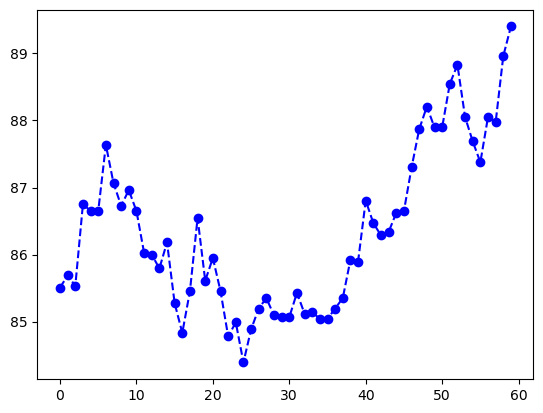

In [5]:
# Plot the data first
plt.plot(phase1_data[measure], color='b', linestyle='--', marker='o')

## a) Fitting of the appropriate model to the dataset

Runs test p-value = 0.000
The data are not random (p-value < 0.05).


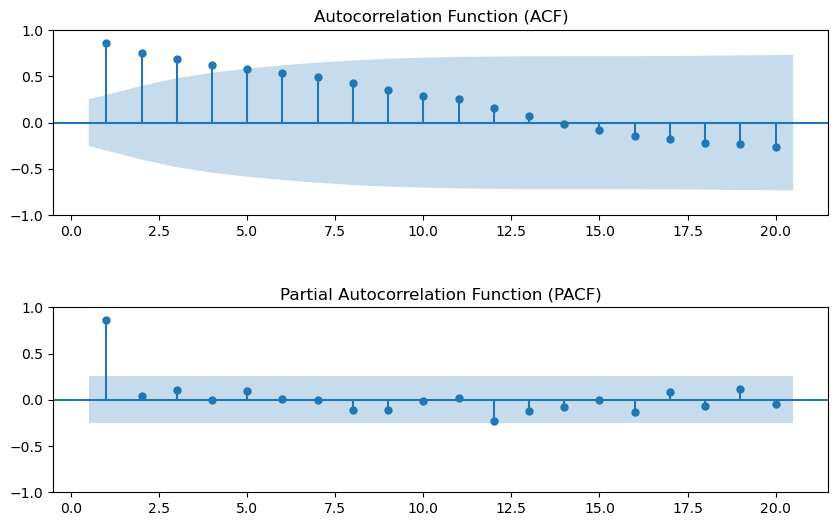

Shapiro-Wilk test p-value = 0.005
The data are not normally distributed (p-value < 0.05).


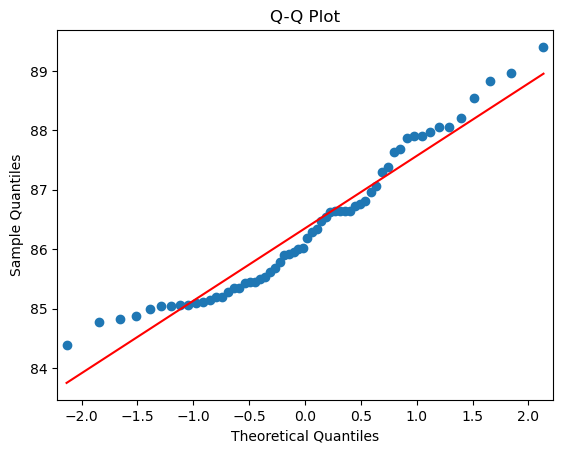

In [6]:
results = qda.runstest_acfpacf_sw(phase1_data, 'Close_Price')

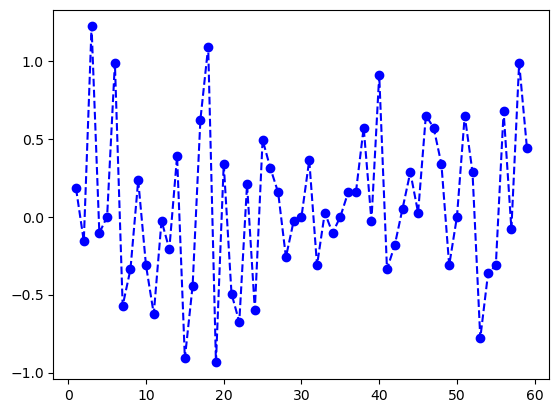

In [7]:
diff_phase1=phase1_data[measure].diff().dropna().to_frame()
# Plot the data first
plt.plot(diff_phase1, color='b', linestyle='--', marker='o')

In [8]:
print(type(diff_phase1))

<class 'pandas.core.frame.DataFrame'>


Runs test p-value = 0.437
The data are random (p-value >= 0.05).


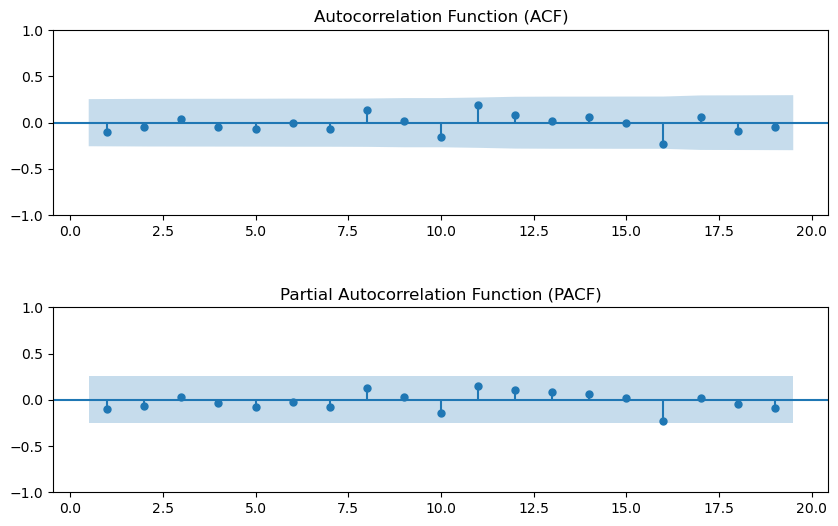

Shapiro-Wilk test p-value = 0.783
The data are normally distributed (p-value >= 0.05).


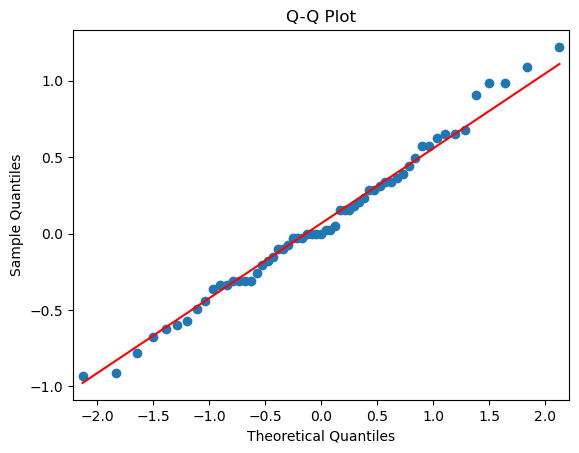

In [9]:
diff_results = qda.runstest_acfpacf_sw(diff_phase1, 'Close_Price')


Let's fit the most optimal ARIMA model using AIC

In [10]:
import itertools

def fit_arima_model(df, column, p_range, d_range, q_range, criterion='aic'):
    """
    Fit an ARIMA model to the given time series data using the specified criterion.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the time series data.
    column (str): The column name of the time series data to be analyzed.
    p_range (tuple): Range of AR values (start, end).
    d_range (tuple): Range of I values (start, end).
    q_range (tuple): Range of MA values (start, end).
    criterion (str): The criterion to use for model selection ('aic' or 'bic').

    Returns:
    model (ARIMA): The fitted ARIMA model.
    best_order (tuple): The (p, d, q) order of the best model.
    best_criterion (float): The value of the best criterion (AIC or BIC).
    """
    if column not in df.columns:
        raise KeyError(f"The specified column '{column}' does not exist in the DataFrame.")
    
    data = df[column]
    
    p = range(p_range[0], p_range[1] + 1)
    d = range(d_range[0], d_range[1] + 1)
    q = range(q_range[0], q_range[1] + 1)
    pdq = list(itertools.product(p, d, q))

    best_criterion = float('inf')
    best_order = None
    best_model = None

    for param in pdq:
        try:
            model = ARIMA(data, order=param)
            results = model.fit()
            current_criterion = results.aic if criterion == 'aic' else results.bic
            if current_criterion < best_criterion:
                best_criterion = current_criterion
                best_order = param
                best_model = results
        except Exception as e:
            continue

    return best_model, best_order, best_criterion

In [11]:
# Assuming 'phase1_data' is already loaded
data = phase1_data['Close_Price']
p_range = (0, 2)
d_range = (0, 2)
q_range = (0, 2)

best_model, best_order, best_criterion = fit_arima_model(phase1_data, 'Close_Price', p_range, d_range, q_range, criterion='aic')
print("Best ARIMA order:", best_order)
print("Best criterion value:", best_criterion)
print(qda.ARIMAsummary(best_model))

c:\Users\franc\.conda\envs\qda-project-WIN-base\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\franc\.conda\envs\qda-project-WIN-base\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Best ARIMA order: (0, 1, 0)
Best criterion value: 86.37447692693343
---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=0

FINAL ESTIMATES OF PARAMETERS
-------------------------------
Empty DataFrame
Columns: [Term, Coef, SE Coef, T-Value, P-Value]
Index: []

RESIDUAL SUM OF SQUARES
-------------------------
  DF      SS     MS
59.0 14.4362 0.2447

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12      7.9580   0.7884
  24     18.8192   0.7616
  36     30.5983   0.7230
  48     37.3551   0.8664
None


Shapiro-Wilk test p-value = 0.783


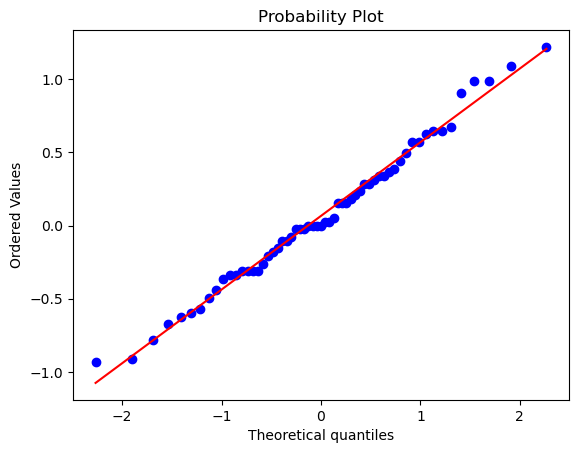

In [12]:
#extract the residuals
residuals = best_model.resid[np.max((best_order)):] 

#extract the fitted values
fits = best_model.fittedvalues[np.max((best_order)):] 
 
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

Runs test p-value = 0.437


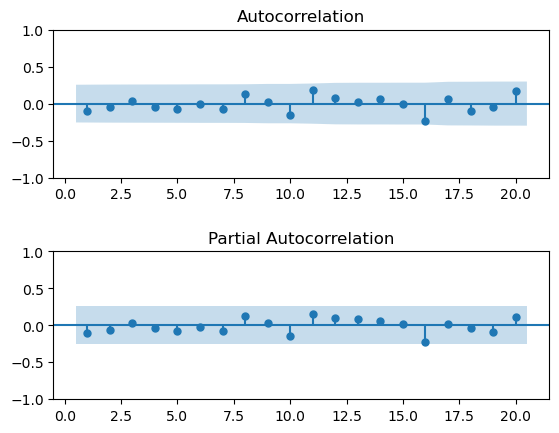

In [13]:
#RANDOMNESS OF MODEL RESIDUALS
_, pval_runs = runstest_1samp(residuals, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

The runs test gives a value higher than 0.05: the test is acceptable

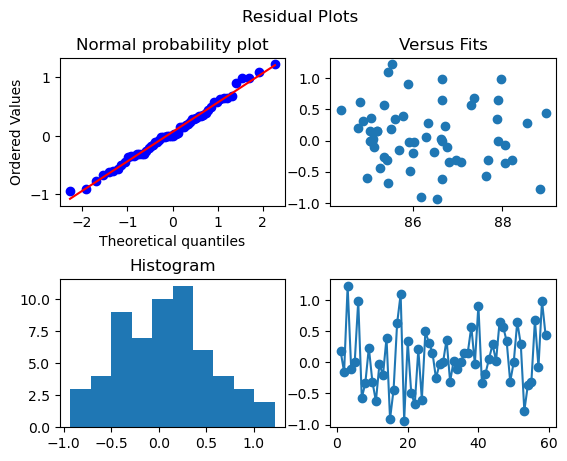

In [14]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

## b) Design the appropriate control charts to monitor the price of the stock such that the average number of trading days between two false alarms is 200. 
Note: in case of violations of control limits, assume no assignable cause was found.

In [15]:
ARL0=200 #Average Run Lenght
typeIerror=1/ARL0
print(typeIerror)

0.005


We will use an I-MR Control Chart for the current application


Let's plot the residuals to which we will fit the I-MR Chart. From the previous steps we know that the residuals data is IID.

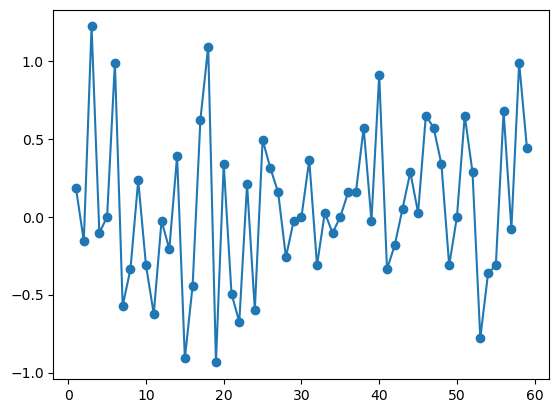

In [16]:
# Convert residuals to DataFrame
residuals_df = pd.DataFrame(residuals, columns=['Residuals'])
# Plot the data
plt.plot(residuals_df['Residuals'], 'o-')
plt.show()

In [17]:
# Find k value
from scipy.stats import norm, boxcox, shapiro
k = norm.ppf(1 - typeIerror / 2)
print(k)

2.807033768343811


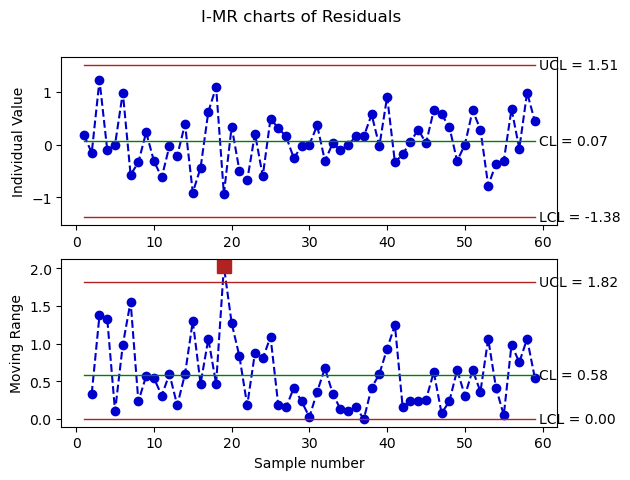

,Residuals,MR,I_UCL,I_CL,I_LCL,I_TEST1,MR_UCL,MR_CL,MR_LCL,MR_TEST1
1,0.1818,NaN,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
2,-0.1558,0.3377,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
3,1.2208,1.3766,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
4,-0.1039,1.3247,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
5,0.0000,0.1039,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN


In [18]:
import qda
data_IMR = qda.ControlCharts.IMR(residuals_df,'Residuals',k)
data_IMR.head()

Let's find the OOC point in the MR chart

In [19]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['MR_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [18]


### MR with probabilistic limits - Power Transformation

When verifying the normality of the MR chart we find a non-normal distribution (half normal, per consturction), it's necessary to transform it and do again the I-MR chart

In [20]:
# Power Transformation
lambda_value=0.44
# Extract the 'MR' column   
MR = pd.DataFrame(data_IMR['MR'])

# Check if there are any values equal to 0
if (MR['MR'] == 0).any():
    # Get the index of the first value equal to 0
    idx = MR[MR['MR'] == 0].index[0]
    # Change it to NaN
    MR['MR'].iloc[idx] = np.nan

    # Transform the data
    MR['MR'] = MR['MR'].transform(lambda x: ((x**lambda_value)))

    # Replace the NaN value with 0
    MR['MR'].iloc[idx] = 0
else:
    # Transform the data without any 0 values present
    MR['MR'] = MR['MR'].transform(lambda x: ((x**lambda_value)))

MR.head()

,MR
1,NaN
2,0.6202
3,1.1510
4,1.1317
5,0.3692


p-value of the Shapiro-Wilk test: 0.934


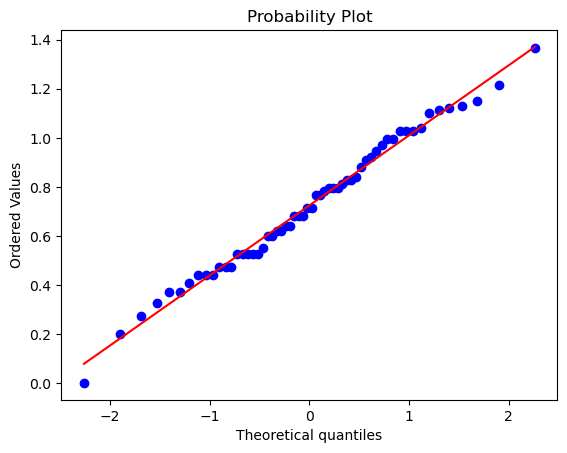

In [21]:
# We can use the Shapiro-Wilk test
data_MR_transformed_dropna = MR['MR'].dropna().to_frame()
_, p_value_SW = stats.shapiro(data_MR_transformed_dropna['MR'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_MR_transformed_dropna['MR'], dist="norm", plot=plt)
plt.show()

> Now you can use the I chart on the transformed data.

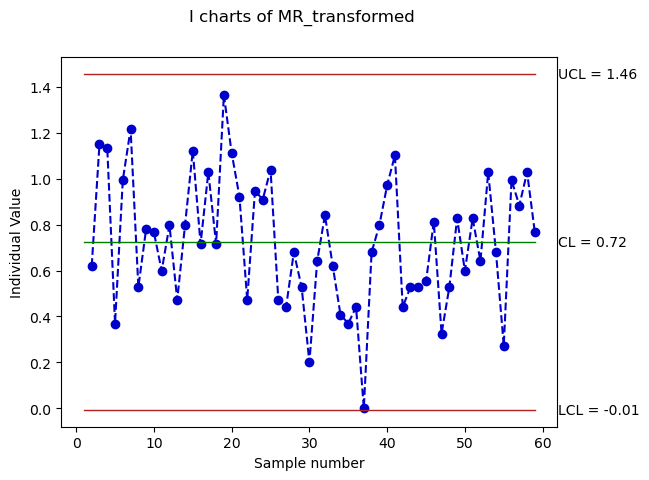

In [22]:
# Change the name of the column in MR to 'MR_transformed'
MR = MR.rename(columns = {'MR': 'MR_transformed'})
data_MR_transformed = qda.ControlCharts.IMR(MR, 'MR_transformed', K = k, plotit = False)

# Plot the I chart with the transformed data
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I charts of MR_transformed'))
ax.plot(data_MR_transformed['MR_transformed'], color='mediumblue', linestyle='--', marker='o')
ax.plot(data_MR_transformed['I_UCL'], color='firebrick', linewidth=1)
ax.plot(data_MR_transformed['I_CL'], color='g', linewidth=1)
ax.plot(data_MR_transformed['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(data_MR_transformed['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_CL'].iloc[0], 'CL = {:.2f}'.format(data_MR_transformed['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(data_MR_transformed['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(data_MR_transformed['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()


## c) Using the control chart(s) designed in point 1 (phase 1), check if the data collected during the following 20 trading days (stored in `stock_price_phase2.csv`) are in control. Report the index of the OOC points, if any.

### ARIMA with Phase2

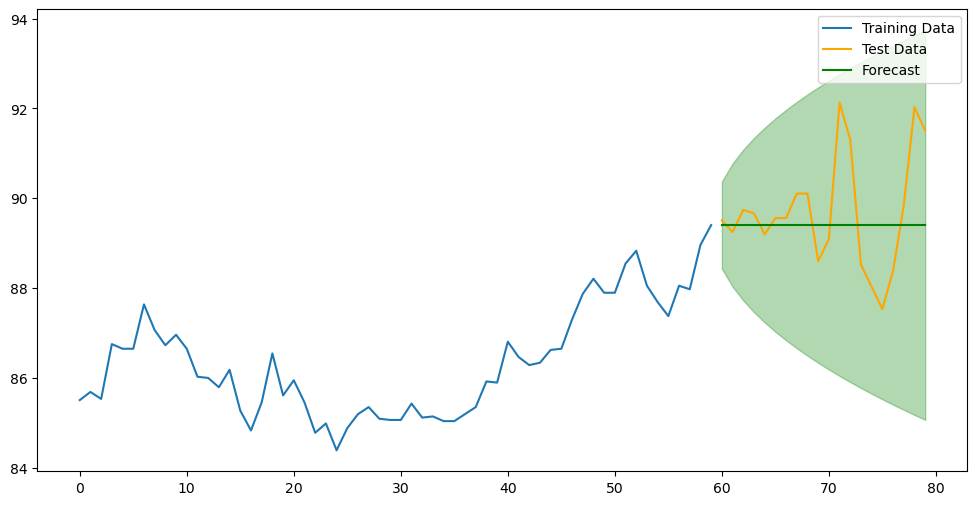

In [23]:
# Now we need to fit the ARIMA model to the compound dataset
# Load the test data
test_data = pd.read_csv('stock_price_phase2.csv')

# Extract the 'Close_Price' column from the test data
test_data = test_data['Close_Price']

# Forecast the next values using the fitted ARIMA model
n_forecasts = len(test_data)
forecast = best_model.get_forecast(steps=n_forecasts)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Combine the training data and the forecasts for comparison
combined_data = pd.concat([data, forecast_mean], ignore_index=True)
combined_ci = pd.concat([pd.DataFrame(index=data.index, columns=forecast_ci.columns), forecast_ci], ignore_index=True)

# Plot the original data and the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data, label='Training Data')
plt.plot(np.arange(len(data), len(data) + n_forecasts), test_data, label='Test Data', color='orange')
plt.plot(np.arange(len(data), len(data) + n_forecasts), forecast_mean, label='Forecast', color='green')
plt.fill_between(np.arange(len(data), len(data) + n_forecasts), 
                 combined_ci.iloc[len(data):, 0], combined_ci.iloc[len(data):, 1], 
                 color='green', alpha=0.3)
plt.legend()
plt.show()


In [24]:
test_data=test_data.reset_index(drop=True)
forecast_mean=forecast_mean.reset_index(drop=True)

In [25]:

# Calculate forecast errors
forecast_errors = test_data - forecast_mean

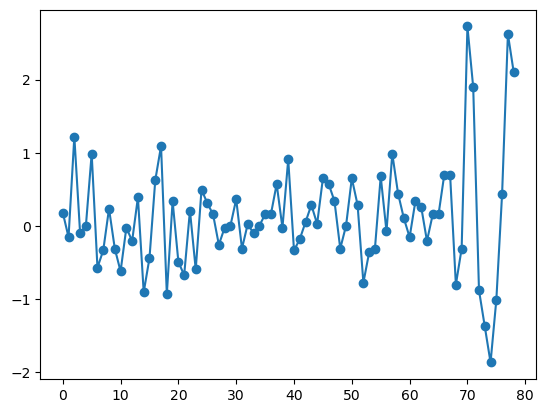

In [26]:

# Convert residuals to DataFrame
residuals_forecast_df = pd.DataFrame(forecast_errors, columns=['Residuals'])

# Append test to training data
combined_residuals = pd.concat([residuals_df, residuals_forecast_df], ignore_index=True)

# Plot the data
plt.plot(combined_residuals['Residuals'], 'o-')
plt.show()

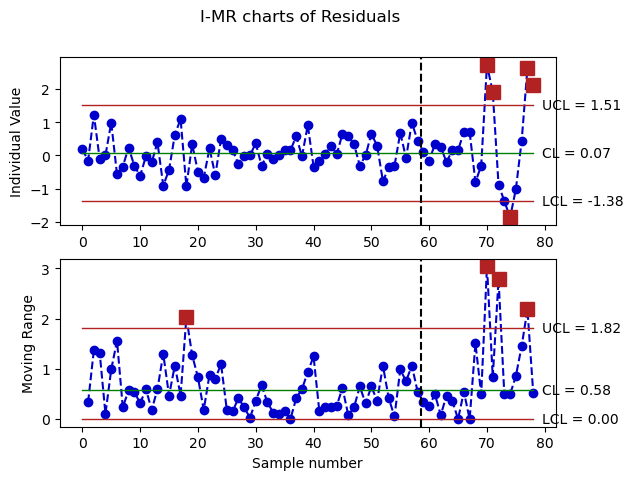

,Residuals,MR,I_UCL,I_CL,I_LCL,I_TEST1,MR_UCL,MR_CL,MR_LCL,MR_TEST1
0,0.1818,NaN,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
1,-0.1558,0.3377,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
2,1.2208,1.3766,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
3,-0.1039,1.3247,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN
4,0.0000,0.1039,1.5143,0.066,-1.3822,NaN,1.8168,0.5822,0,NaN


In [27]:
import qda
data_IMR = qda.ControlCharts.IMR(combined_residuals,'Residuals',k,subset_size=len(residuals_df))
data_IMR.head()

In [28]:
data_IMR['MR'].describe()

# Extract the 'MR' column   
MR = pd.DataFrame(data_IMR['MR'])
# Get the index of the value equal to 0
idx = MR[MR['MR'] == 0].index[0]
# Change it to NaN
MR['MR'].iloc[idx] = np.nan
# Transform the data
MR['MR'] = MR['MR'].transform(lambda x: ((x**lambda_value)))
# Replace the NaN value with 0
MR['MR'].iloc[idx] = 0

p-value of the Shapiro-Wilk test: 0.538


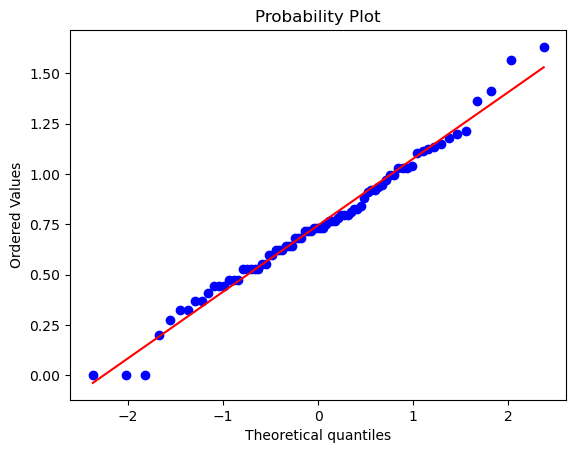

In [29]:
# We can use the Shapiro-Wilk test
data_MR_transformed_dropna = MR.dropna()
_, p_value_SW = stats.shapiro(data_MR_transformed_dropna['MR'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_MR_transformed_dropna['MR'], dist="norm", plot=plt)
plt.show()

> Now you can use the I chart on the transformed data.

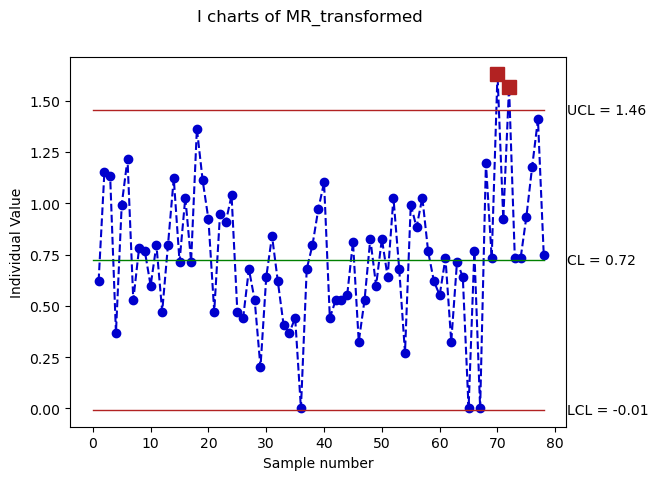

In [30]:
# Change the name of the column in MR to 'MR_transformed'
MR = MR.rename(columns = {'MR': 'MR_transformed'})
data_MR_transformed = qda.ControlCharts.IMR(MR, 'MR_transformed', K = k, plotit = False,subset_size=len(residuals_df))

# Plot the I chart with the transformed data
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I charts of MR_transformed'))
ax.plot(data_MR_transformed['MR_transformed'], color='mediumblue', linestyle='--', marker='o')
ax.plot(data_MR_transformed['I_UCL'], color='firebrick', linewidth=1)
ax.plot(data_MR_transformed['I_CL'], color='g', linewidth=1)
ax.plot(data_MR_transformed['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(data_MR_transformed['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_CL'].iloc[0], 'CL = {:.2f}'.format(data_MR_transformed['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(data_MR_transformed['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(data_MR_transformed['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()


In [31]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

# Find the index of the I_TEST1 on MR column different from NaN
OOC_idx = np.where(data_MR_transformed['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [70 71 74 77 78]
The index of the OOC point is: [70 72]
